In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

___
## Call the data sets

In [2]:
air = wrangle.clean_air()
air.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
0,2021-05-20 00:01:27,8,6,8,0,0.0,0,0,None,2021-05-20,...,3,Good,0.141204,Good,Good,6.704282,Good,Good,8.568287,Good


In [186]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106287 entries, 0 to 106286
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   datetime         106287 non-null  datetime64[ns]
 1   Pm1_0            106287 non-null  int64         
 2   Pm2_5            106287 non-null  int64         
 3   Pm10             106287 non-null  int64         
 4   SO2              106287 non-null  int64         
 5   O3               106287 non-null  float64       
 6   CO               106287 non-null  int64         
 7   NO2              106287 non-null  int64         
 8   alert_triggered  106287 non-null  object        
 9   dates            106287 non-null  object        
 10  time             106287 non-null  object        
 11  hour             106287 non-null  int64         
 12  weekday          106287 non-null  int64         
 13  AQI_CO           106287 non-null  category      
 14  CO_24hr          106

In [3]:
air.AQI_CO.value_counts()

Good                              106142
Moderate                             121
Hazardous                             23
Unhealthy                              1
Very Unhealthy                         0
Unhealthy for Sensitive Groups         0
Name: AQI_CO, dtype: int64

In [4]:
air.AQI_CO_24hr.value_counts()

Good                              106287
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Moderate                               0
Name: AQI_CO_24hr, dtype: int64

In [5]:
air.AQI_pm2_5.value_counts()

Good                              78187
Moderate                          24820
Unhealthy for Sensitive Groups     2373
Unhealthy                           859
Hazardous                             3
Very Unhealthy                        1
Name: AQI_pm2_5, dtype: int64

In [6]:
air.AQI_pm_25_24hr.value_counts()

Good                              78017
Moderate                          24817
Unhealthy                          3453
Hazardous                             0
Very Unhealthy                        0
Unhealthy for Sensitive Groups        0
Name: AQI_pm_25_24hr, dtype: int64

In [7]:
air.AQI_pm10.value_counts()

Good                              104539
Moderate                            1744
Unhealthy for Sensitive Groups         1
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Name: AQI_pm10, dtype: int64

In [8]:
air.AQI_pm10_24hr.value_counts()

Good                              106287
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Moderate                               0
Name: AQI_pm10_24hr, dtype: int64

More info on air quality (idea is to make a level of air quality)
- https://forum.airnowtech.org/t/the-aqi-equation/169
- https://forum.airnowtech.org/t/aqi-calculations-overview-ozone-pm2-5-and-pm10/168
- https://www.airnow.gov/aqi/aqi-basics/
- https://fit.thequint.com/health-news/explaining-air-quality-index#read-more
- https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf
- https://www.epa.gov/sites/production/files/2014-05/documents/zell-aqi.pdf
- 

In [9]:
#air['dates'] = pd.to_datetime(air['datetime']).dt.date
#air['time'] = pd.to_datetime(air['datetime']).dt.time
#air['hour'] = pd.to_datetime(air['datetime']).dt.hour
#air['weekday'] = pd.to_datetime(air['datetime']).dt.weekday

In [10]:
#pm_25_24hr = air.groupby('dates', as_index=False)['Pm2_5'].mean()
#pm_25_24hr.sample()

In [11]:
#pm_25_24hr= pm_25_24hr.rename(columns={'Pm2_5':'Pm_25_24hr'})
#pm_25_24hr.sample()

In [12]:
#air = air.merge(pm_25_24hr, on = 'dates', how ='left')
#air.sample()

In [13]:
#air['AQI_pm_25_24hr'] = pd.cut(air.CO, 
                            #bins = [-1,12.1,35.5,55.5,150.5,250.5,4000],
                            #labels = ['Good', 'Moderate', 
                                      #'Unhealthy for Sensitive Groups', "Unhealthy", 
                                      #"Very Unhealthy", 'Hazardous'])
#air.sample()

In [15]:
#df = air[air.CO == -999]
#df

In [16]:
air_train, air_validate, air_test = wrangle.split_data(air)

In [17]:
flood = wrangle.clean_flood()
flood.head(1)

,datetime,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
0,2021-05-20 00:11:55,13.188976,4.02,13.500656,4.115,0.31168,0.095


In [18]:
flood_train, flood_validate, flood_test = wrangle.split_data(flood)

In [19]:
weather = wrangle.wrangle_weather()
weather.head(1)

,datetime,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure
0,2021-05-11 00:04:16,19,66.0,93.0,17.841194,64.114149,978


In [20]:
weather_train, weather_validate, weather_test = wrangle.split_data(weather)

In [21]:
sound = wrangle.wrangle_sound()
sound.head(1)

,DateTime,NoiseLevel_db,noise_level
0,2021-05-20 00:01:27,61,Moderate


In [22]:
sound['noise_level'] = pd.cut(sound.NoiseLevel_db, 
                                bins = [-1,46,66,81,101,4000],
                                labels = ['Normal', 'Moderate', 
                                          'Loud', "Very Loud", 
                                          "Extremely Loud"])
sound.head(1)

,DateTime,NoiseLevel_db,noise_level
0,2021-05-20 00:01:27,61,Moderate


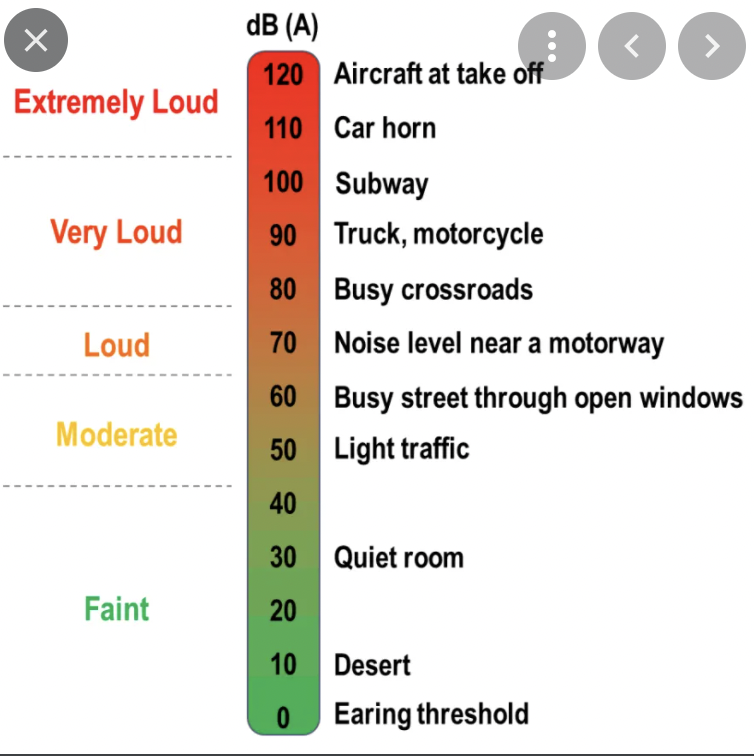

In [23]:
sound_train, sound_validate, sound_test = wrangle.split_data(sound)

In [24]:
saws = wrangle.wrangle_saws()
saws.head(1)

Record #,274262,274263,274264,274266,274267,274268,274269,274270,274271,274272,...,544498,545902,545903,545905,545906,545908,545909,545910,545911,545913
17-JAN,6733,5237,2992,4489,0,748,2992,748,17206,748,...,14214,5237,6733,8229,4489,2244,5985,5985,5985,7481


In [25]:
saws_train, saws_validate, saws_test = wrangle.split_data(saws)

___
# Explore Air Quality

### Questions we asked about air quality
- Are there spikes in air quality at certain times or days?
- Is air quality and water consumption worse on the weekends?
- How is the air quality after it floods?
- What type of weather has the best air quality?
- As air quality gets worse water consumption goes up.
- Does air quality influence water consumption?

In [26]:
air.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
0,2021-05-20 00:01:27,8,6,8,0,0.0,0,0,None,2021-05-20,...,3,Good,0.141204,Good,Good,6.704282,Good,Good,8.568287,Good



## Univariate Exploration

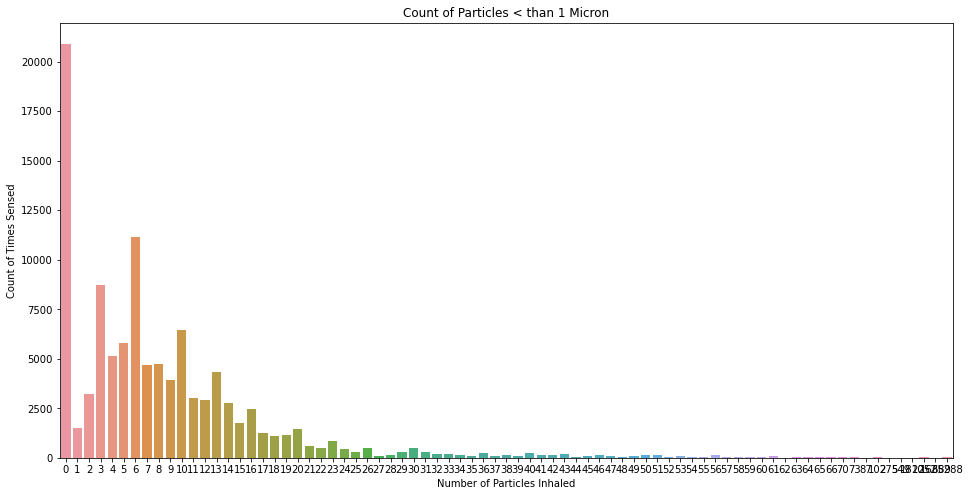

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm1_0')
plt.title('Count of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

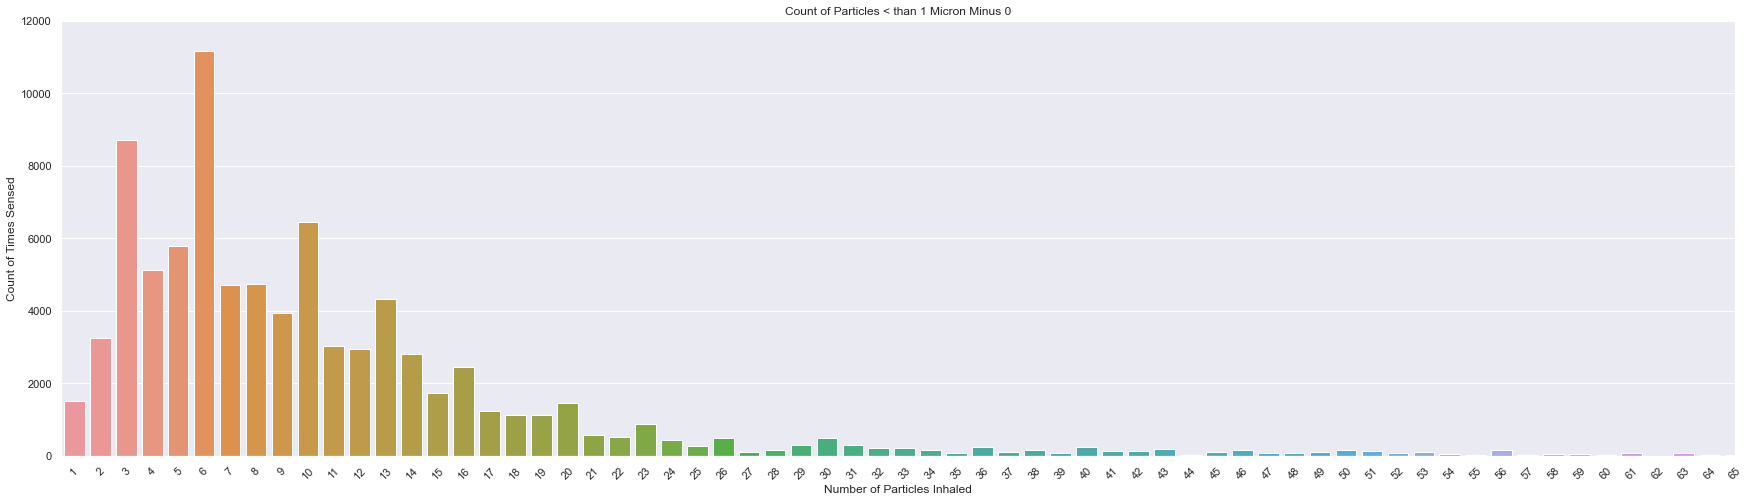

In [67]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm1_0')
plot.set(xlim=(0.5, 65))
plot.set(ylim=(0, 12000))
plt.xticks(rotation=45)
plt.title('Count of Particles < than 1 Micron Minus 0')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

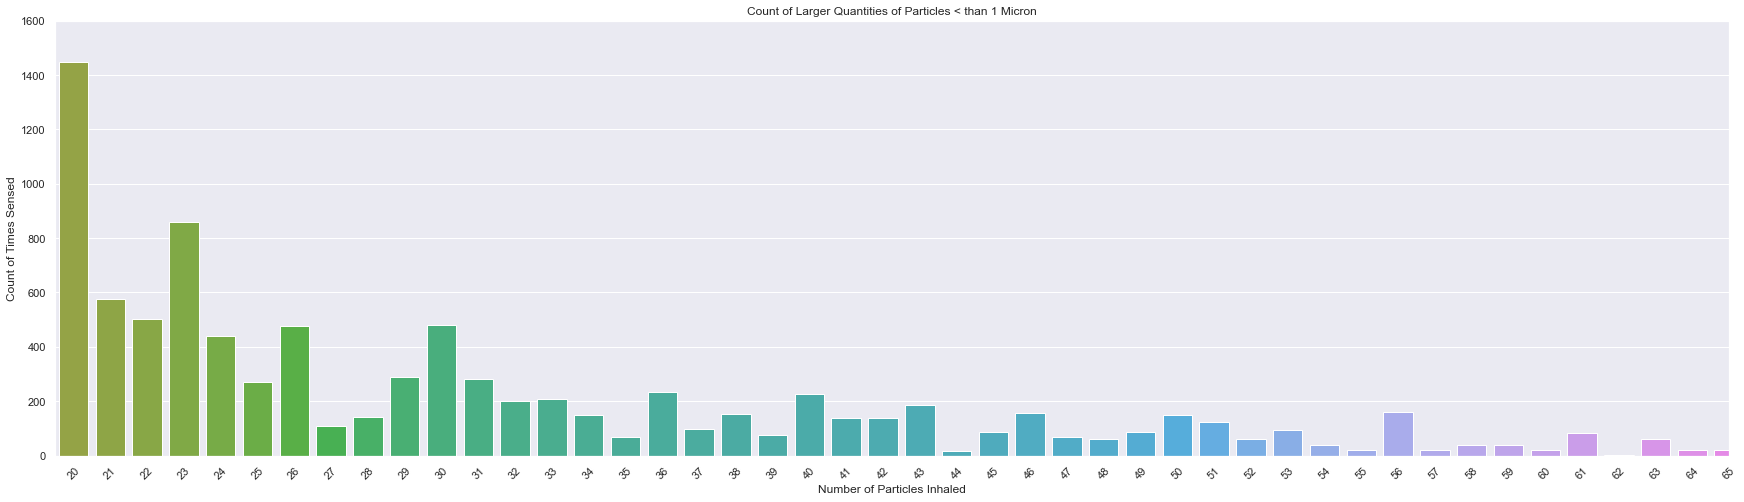

In [70]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm1_0')
plot.set(xlim=(19.5, 65))
plot.set(ylim=(0, 1600))
plt.xticks(rotation=45)
plt.title('Count of Larger Quantities of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [30]:
air.Pm1_0.value_counts()

0       20907
6       11171
3        8703
10       6454
5        5783
        ...  
549         1
275         1
62          1
1812        1
87          1
Name: Pm1_0, Length: 77, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 6, 3, 10, and 5
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes at 36, and 56
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.
___

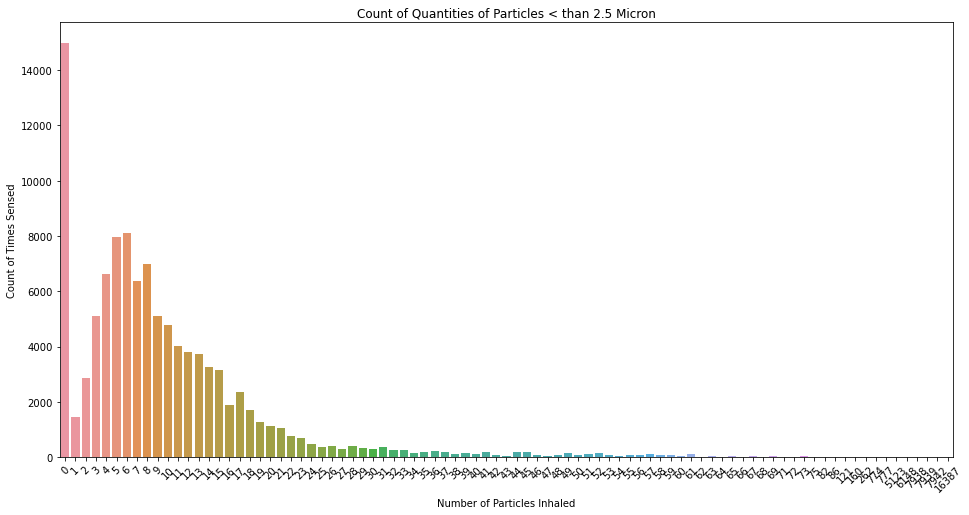

In [31]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm2_5')
plt.xticks(rotation=45)
plt.title('Count of Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

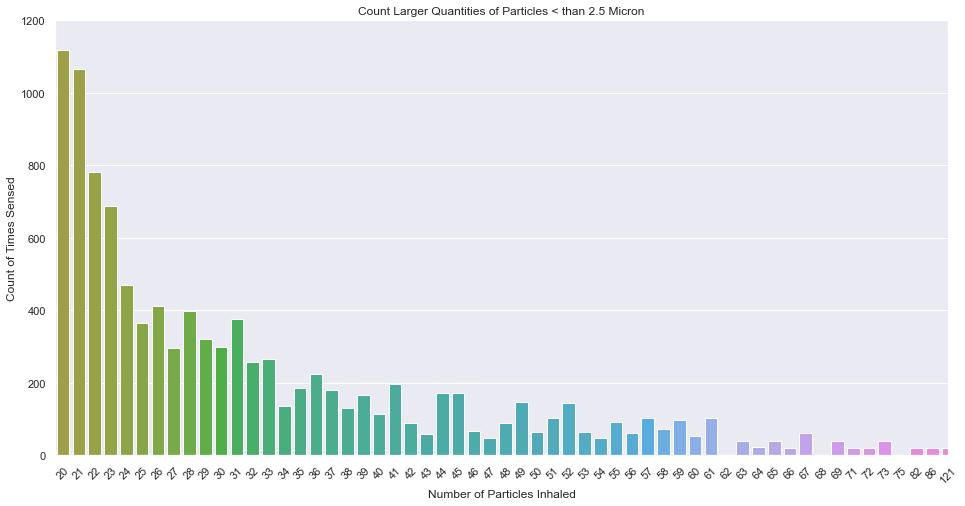

In [75]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='Pm2_5')
plot.set(xlim=(19.5, 76))
plot.set(ylim=(0, 1200))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [33]:
air.Pm2_5.value_counts()

0       14980
6        8102
5        7960
8        7001
4        6626
        ...  
160         1
7942        1
262         1
774         1
75          1
Name: Pm2_5, Length: 87, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 6, 5, 8, and 4
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes throughout

___

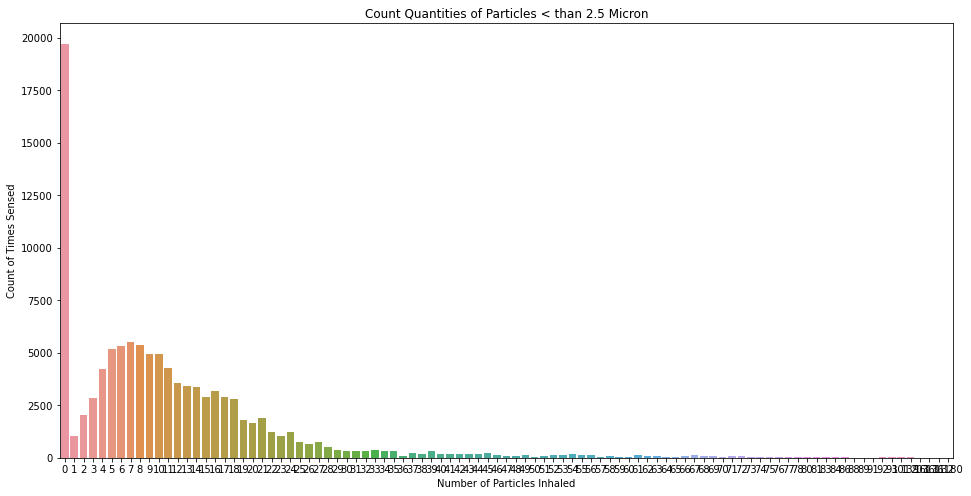

In [34]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm10')
plt.title('Count Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

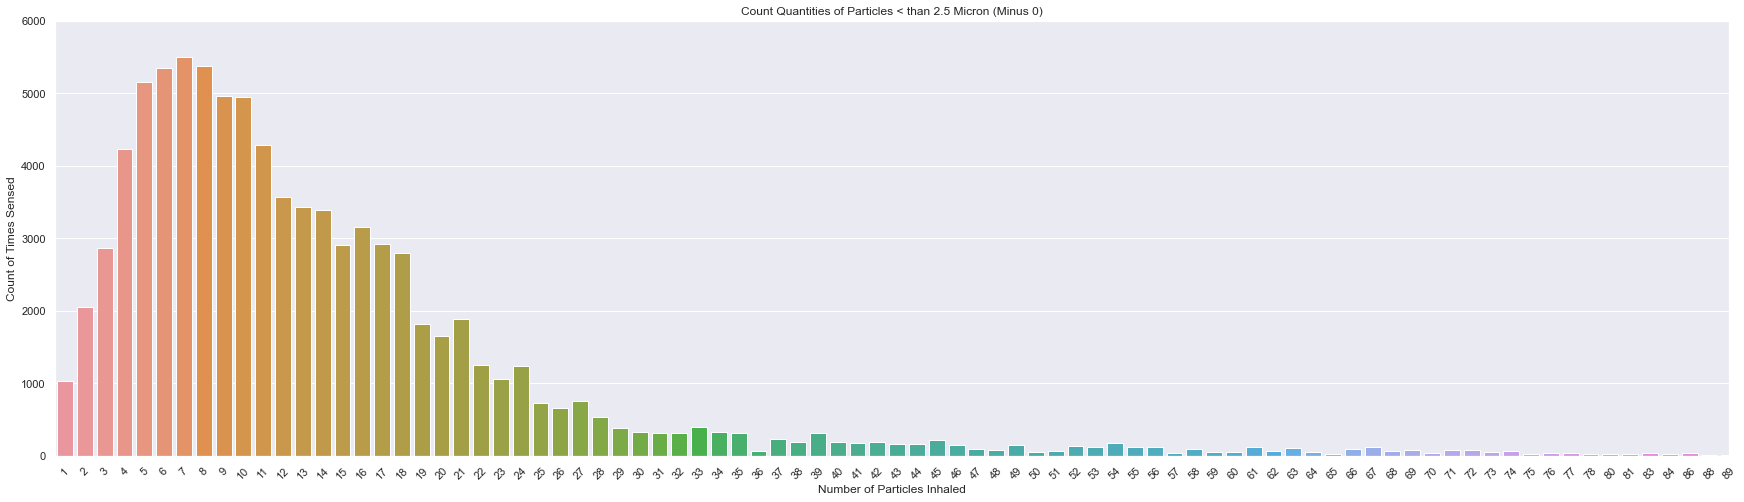

In [78]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm10')
plot.set(xlim=(0.5, 85))
plot.set(ylim=(0, 6000))
plt.xticks(rotation=45)
plt.title('Count Quantities of Particles < than 2.5 Micron (Minus 0)')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

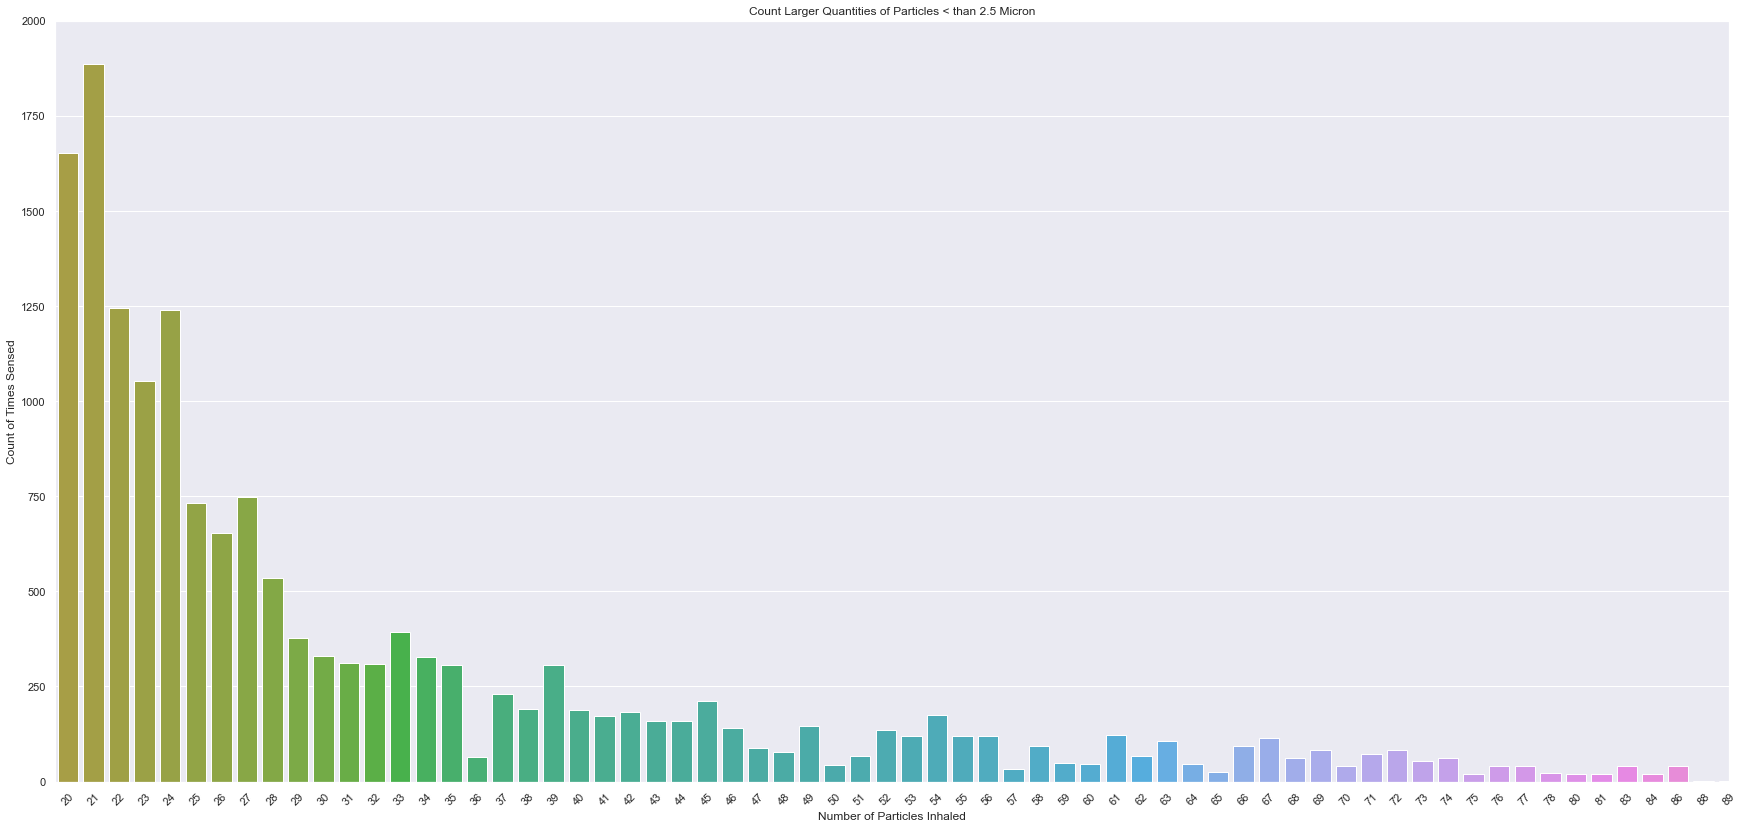

In [79]:
plt.figure(figsize=(30,14))
plot = sns.countplot(data=air, x='Pm10')
plot.set(xlim=(19.5, 85))
plot.set(ylim=(0, 2000))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [37]:
air.Pm10.value_counts()

0        19723
7         5501
8         5376
6         5346
5         5159
         ...  
89           1
16132        1
88           1
203          1
16180        1
Name: Pm10, Length: 95, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 7, 8, 6, and 5
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes throughout
___

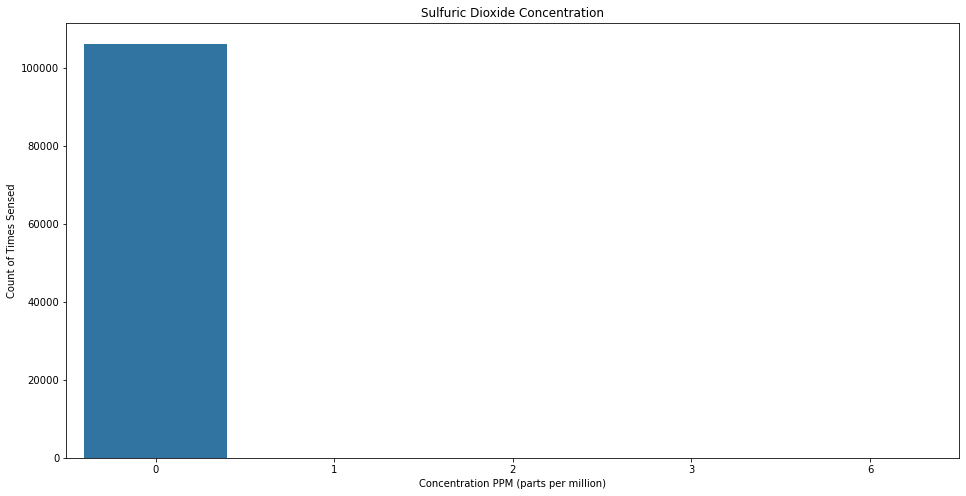

In [38]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='SO2')
plt.title('Sulfuric Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

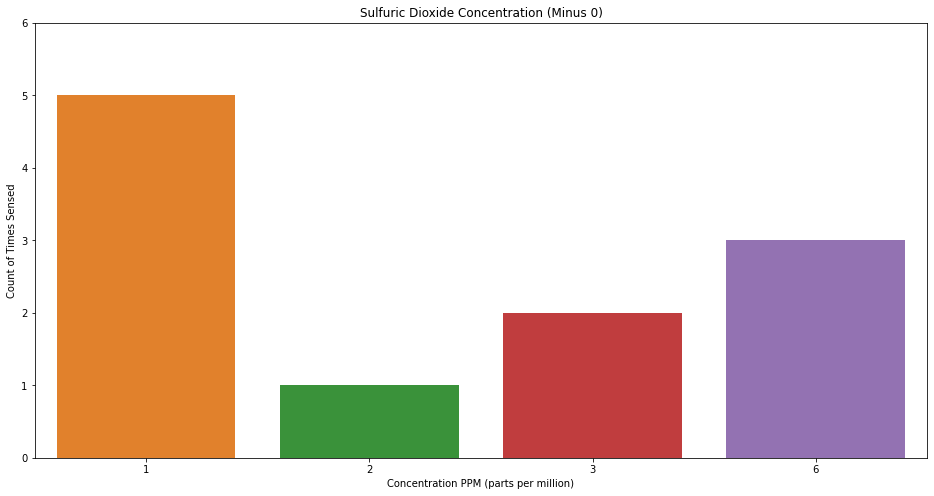

In [39]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='SO2')
plot.set(xlim=(0.5, 4.5))
plot.set(ylim=(0, 6))
plt.title('Sulfuric Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [40]:
air.SO2.value_counts()

0    106276
1         5
6         3
3         2
2         1
Name: SO2, dtype: int64

### Takeaways:
- There are barley and readings outside of no reading for SO2

___

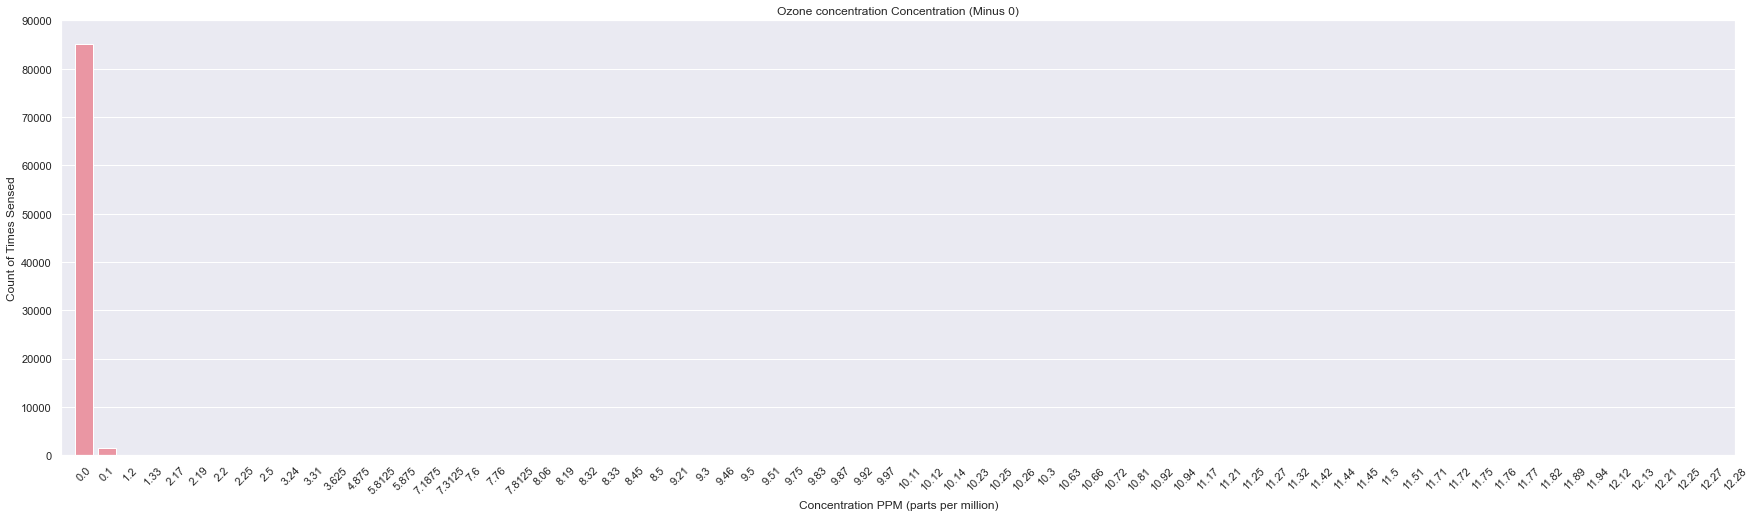

In [86]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='O3')
plot.set(xlim=(-1, 72))
plot.set(ylim=(0, 90000))
plt.xticks(rotation=45)
plt.title('Ozone concentration Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

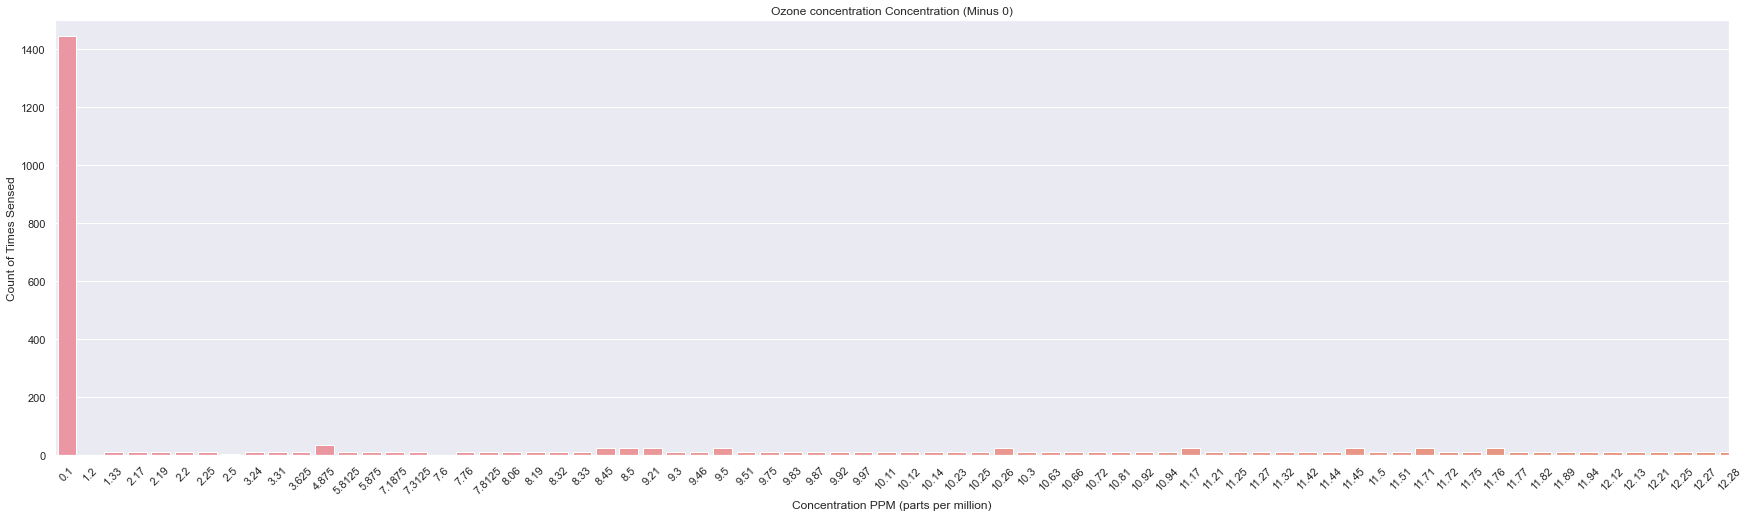

In [89]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='O3')
plot.set(xlim=(0.5, 72))
plot.set(ylim=(0, 1500))
plt.xticks(rotation=45)
plt.title('Ozone concentration Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [43]:
air.O3.value_counts()

0.0000     85208
0.1000      1447
36.3125      168
24.1250      144
26.0000      144
           ...  
26.2000        8
21.5600        4
2.5000         4
1.2000         2
7.6000         1
Name: O3, Length: 1210, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 32, 36, 26, and 23
- There is no obvious trends
- There are large spikes throughout all levels of concentration.
___ 

Text(0, 0.5, 'Count of Times Sensed')

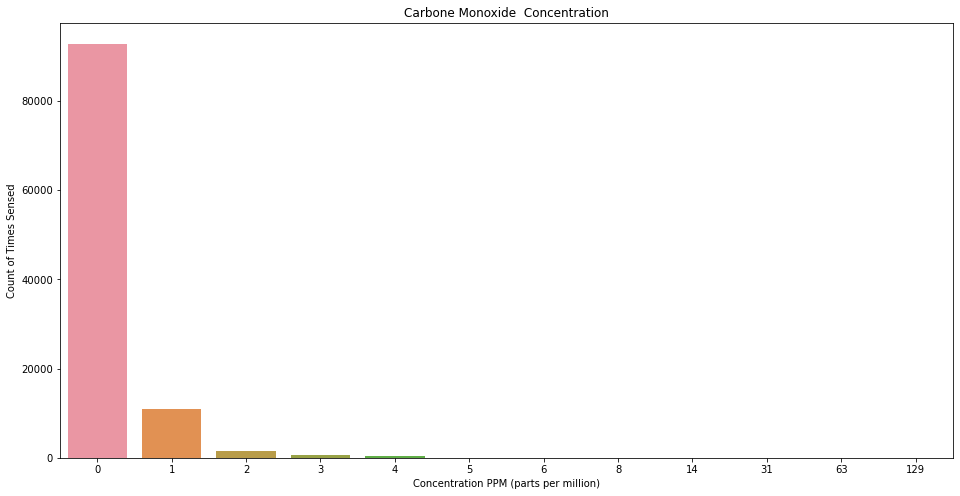

In [44]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='CO')
plt.title('Carbone Monoxide  Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

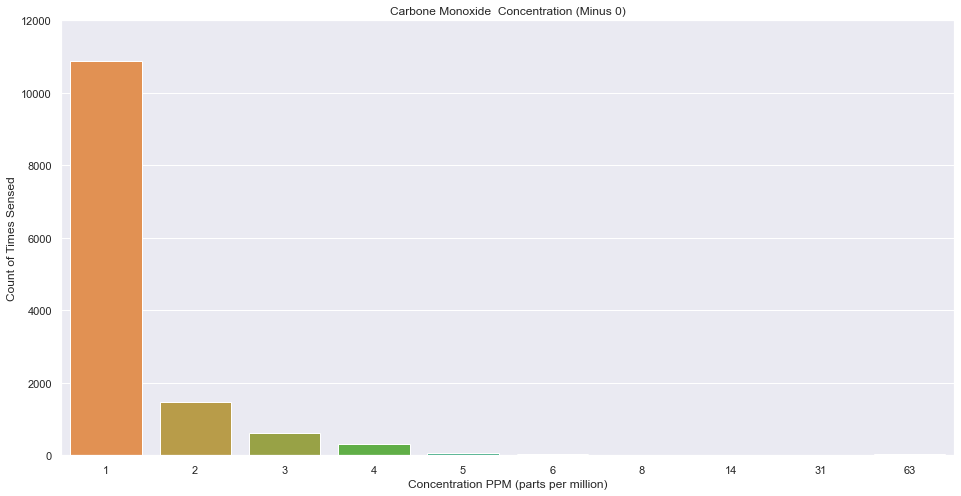

In [96]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='CO')
plot.set(xlim=(0.5, 10.5))
plot.set(ylim=(0, 12000))
plt.title('Carbone Monoxide  Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [46]:
air.CO.value_counts()

0      92859
1      10890
2       1474
3        617
4        302
5         60
6         41
63        21
8         20
31         1
14         1
129        1
Name: CO, dtype: int64

### Takeaways:
- The higher the concentration the lower the amount of times it has been recorded.
- spike at 63
    - concentration of 63 was read 21 times but everything after 5 has only been picked up 1 time each.

___

Text(0, 0.5, 'Count of Times Sensed')

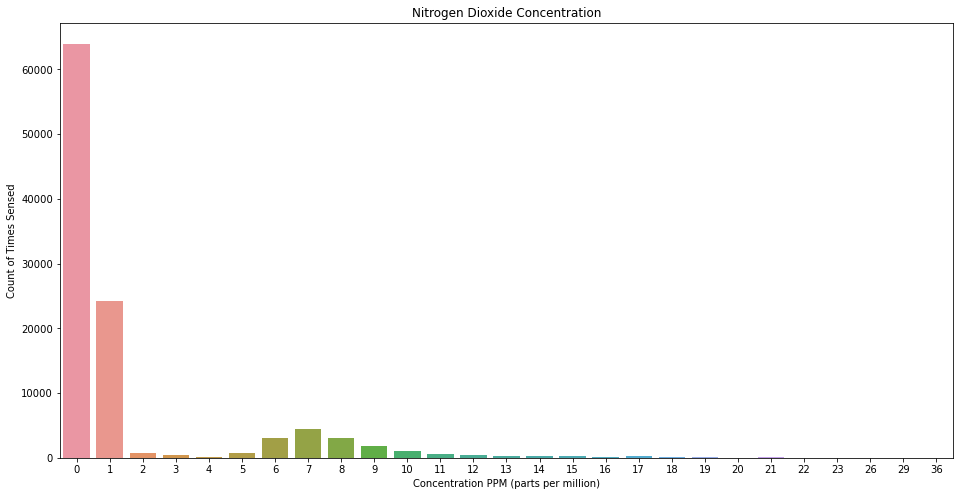

In [47]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='NO2')
plt.title('Nitrogen Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

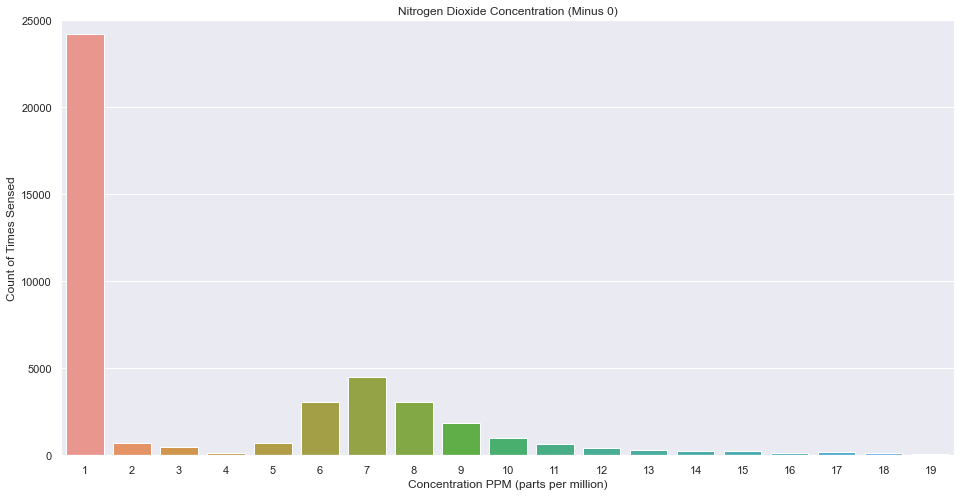

In [102]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='NO2')
plot.set(xlim=(0.5, 19.5))
plot.set(ylim=(0, 25000))
plt.title('Nitrogen Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [49]:
air.NO2.value_counts()

0     63963
1     24226
7      4488
6      3084
8      3084
9      1848
10      996
5       720
2       708
11      624
3       492
12      444
13      313
15      228
14      217
17      204
4       156
16      144
18      132
19       72
21       48
20       36
29       12
22       12
23       12
26       12
36       12
Name: NO2, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 1, 7, 6, and 8
- Barely and readings between 2-5 and 13-19

___

Text(0, 0.5, 'Number of Times it Tiggered an Alert')

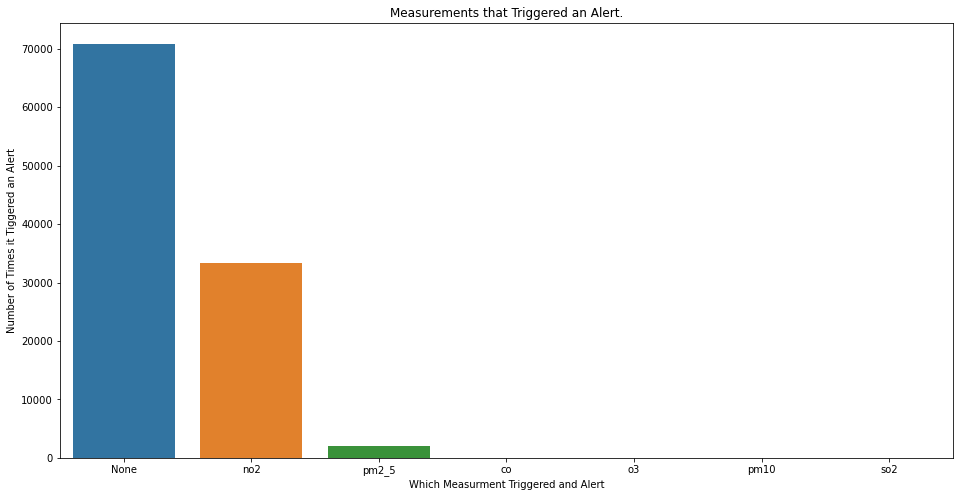

In [50]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='alert_triggered')
plt.title('Measurements that Triggered an Alert.')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

Text(0, 0.5, 'Number of Times it Tiggered an Alert')

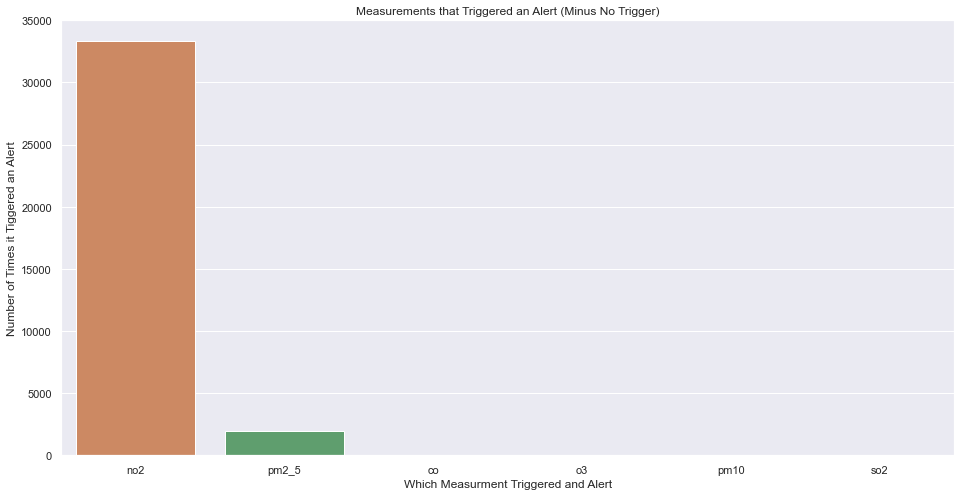

In [106]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='alert_triggered')
plot.set(xlim=(0.5, 6.5))
plot.set(ylim=(0, 35000))
plt.title('Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

In [52]:
air.alert_triggered.value_counts()

None     70869
no2      33358
pm2_5     1972
o3          48
co          24
so2         13
pm10         3
Name: alert_triggered, dtype: int64

### Takeaways:
- Nitrogen Dioxide mostly contributes to being a trigger.
___

## Bivariate

### Questions we asked about air quality
- Are there spikes in air quality at certain times or days?
- Is air quality and water consumption worse on the weekends?
- How is the air quality after it floods?
- What type of weather has the best air quality?
- As air quality gets worse water consumption goes up.
- Does air quality influence water consumption?

In [53]:
air_train.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
69490,2021-06-17 20:55:54,21,21,25,0,0.1,0,1,no2,2021-06-17,...,3,Good,0.627894,Good,Moderate,13.152199,Moderate,Good,16.03125,Good


Text(0.5, 1.0, 'Sales Amount by Weekday')

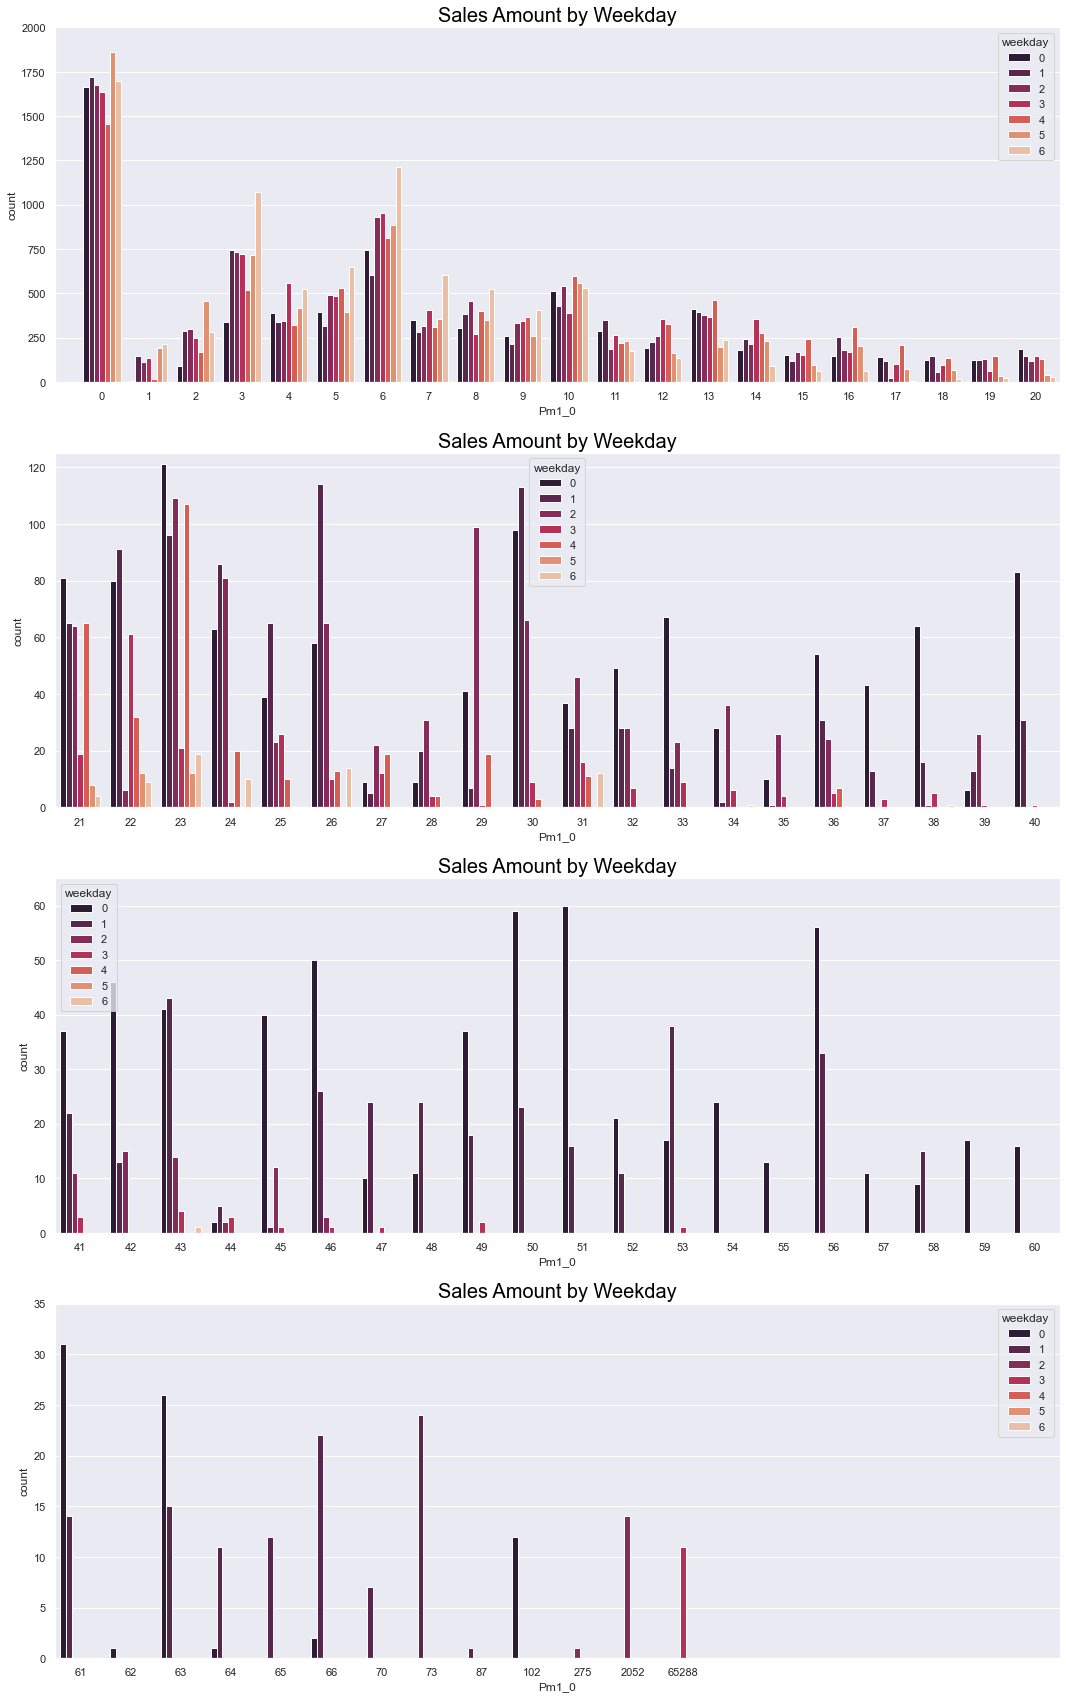

In [115]:
plt.subplots(4,1, figsize=(18,30), sharey=True)
sns.set(style="darkgrid")

plt.subplot(4,1,1)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(-1, 20.5))
plot.set(ylim=(0, 2000))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(4,1,2)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(20.5, 40.5))
plot.set(ylim=(0, 125))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(4,1,3)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(40.5, 60.5))
plot.set(ylim=(0, 65))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(4,1,4)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(60.5, 80.5))
plot.set(ylim=(0, 35))
plt.title('Sales Amount by Weekday', size=20, color='black')

In [134]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106287 entries, 0 to 106286
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   datetime         106287 non-null  datetime64[ns]
 1   Pm1_0            106287 non-null  int64         
 2   Pm2_5            106287 non-null  int64         
 3   Pm10             106287 non-null  int64         
 4   SO2              106287 non-null  int64         
 5   O3               106287 non-null  float64       
 6   CO               106287 non-null  int64         
 7   NO2              106287 non-null  int64         
 8   alert_triggered  106287 non-null  object        
 9   dates            106287 non-null  object        
 10  time             106287 non-null  object        
 11  hour             106287 non-null  int64         
 12  weekday          106287 non-null  int64         
 13  AQI_CO           106287 non-null  category      
 14  CO_24hr          106

In [135]:
air.alert_triggered.value_counts()

None     70869
no2      33358
pm2_5     1972
o3          48
co          24
so2         13
pm10         3
Name: alert_triggered, dtype: int64

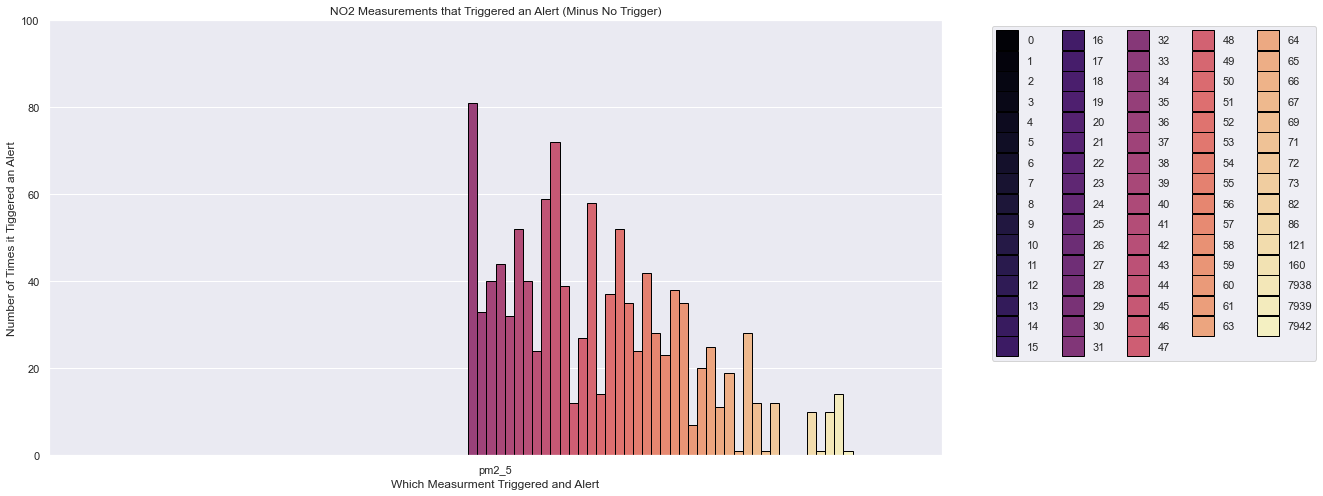

In [128]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 100))
plt.title('NO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=5,handleheight=2.4, labelspacing=0.05)

In [149]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106287 entries, 0 to 106286
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   datetime         106287 non-null  datetime64[ns]
 1   Pm1_0            106287 non-null  int64         
 2   Pm2_5            106287 non-null  int64         
 3   Pm10             106287 non-null  int64         
 4   SO2              106287 non-null  int64         
 5   O3               106287 non-null  float64       
 6   CO               106287 non-null  int64         
 7   NO2              106287 non-null  int64         
 8   alert_triggered  106287 non-null  object        
 9   dates            106287 non-null  object        
 10  time             106287 non-null  object        
 11  hour             106287 non-null  int64         
 12  weekday          106287 non-null  int64         
 13  AQI_CO           106287 non-null  category      
 14  CO_24hr          106

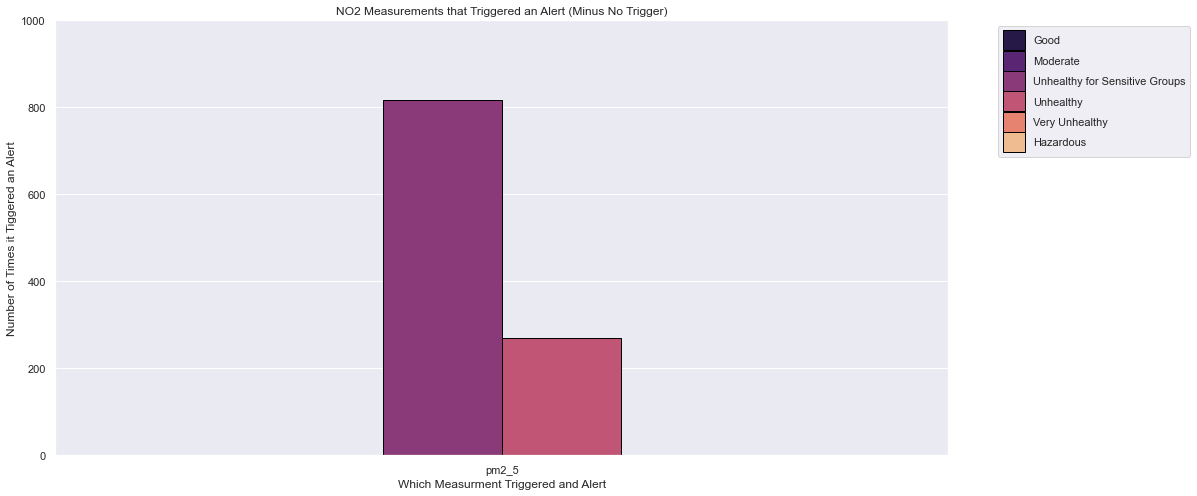

In [152]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 1000))
plt.title('NO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

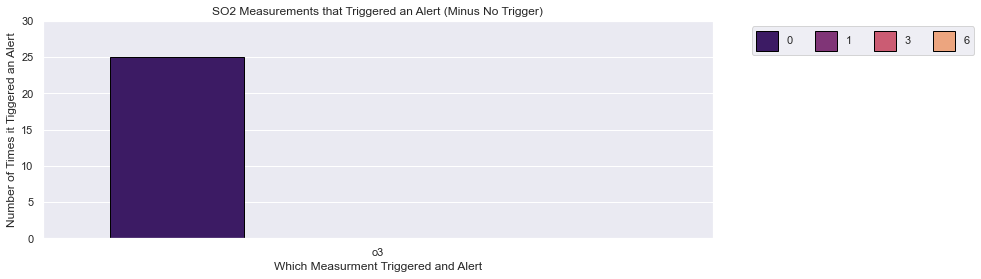

In [130]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='SO2', palette='magma',edgecolor='black')
plot.set(xlim=(2.5, 3.5))
plot.set(ylim=(0, 30))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=5,handleheight=2.4, labelspacing=0.05)


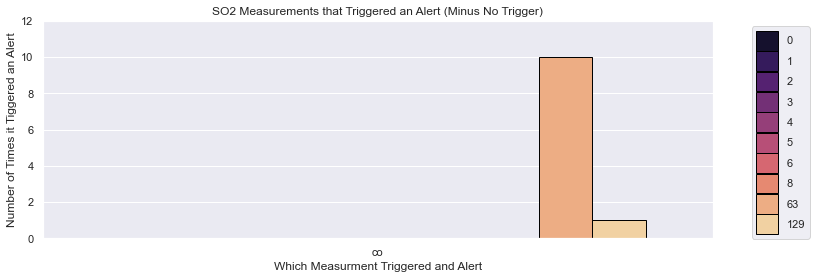

In [154]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='CO', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 12))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [155]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106287 entries, 0 to 106286
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   datetime         106287 non-null  datetime64[ns]
 1   Pm1_0            106287 non-null  int64         
 2   Pm2_5            106287 non-null  int64         
 3   Pm10             106287 non-null  int64         
 4   SO2              106287 non-null  int64         
 5   O3               106287 non-null  float64       
 6   CO               106287 non-null  int64         
 7   NO2              106287 non-null  int64         
 8   alert_triggered  106287 non-null  object        
 9   dates            106287 non-null  object        
 10  time             106287 non-null  object        
 11  hour             106287 non-null  int64         
 12  weekday          106287 non-null  int64         
 13  AQI_CO           106287 non-null  category      
 14  CO_24hr          106

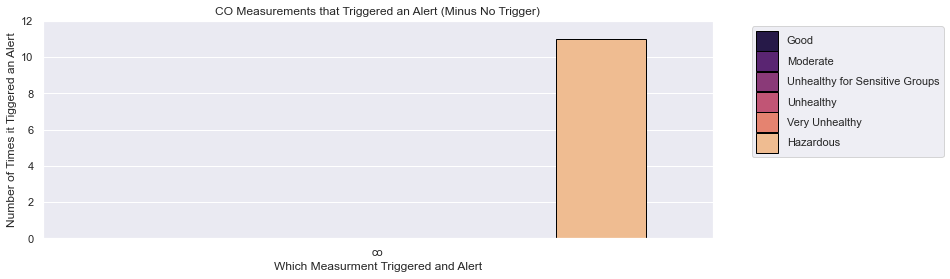

In [157]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_CO', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 12))
plt.title('CO Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

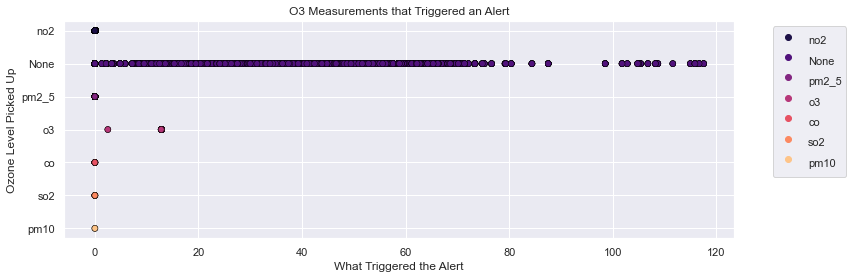

In [144]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=air_train, hue='alert_triggered', x='O3', y='alert_triggered', palette='magma',edgecolor='black')
plt.title('O3 Measurements that Triggered an Alert')
plt.xlabel('What Triggered the Alert')
plt.ylabel('Ozone Level Picked Up')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=1,handleheight=2.4, labelspacing=0.05)


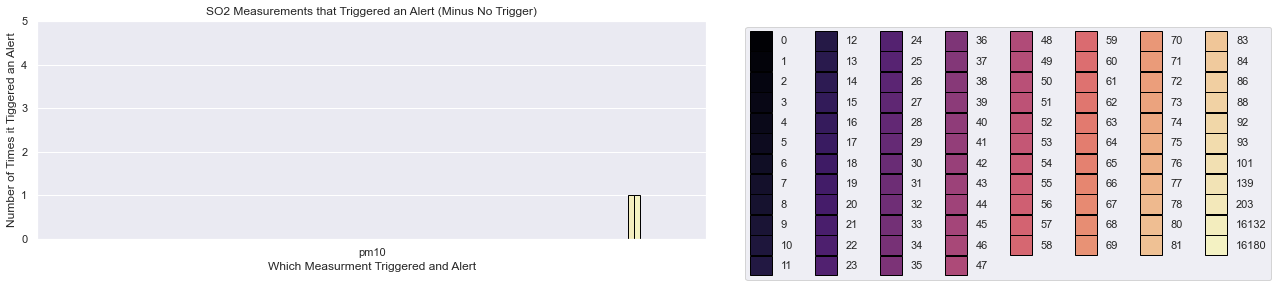

In [148]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm10', palette='magma',edgecolor='black')
plot.set(xlim=(5.5, 6.5))
plot.set(ylim=(0, 5))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=8,handleheight=2.4, labelspacing=0.05)

In [61]:
air_train

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
69490,2021-06-17 20:55:54,21,21,25,0,0.10,0,1,no2,2021-06-17,...,3,Good,0.627894,Good,Moderate,13.152199,Moderate,Good,16.031250,Good
38450,2021-05-29 14:31:35,0,0,0,0,0.00,1,0,no2,2021-05-29,...,5,Good,0.069444,Good,Good,94.076968,Unhealthy,Good,2.742477,Good
66964,2021-06-16 05:01:53,8,8,11,0,0.00,0,0,None,2021-06-16,...,2,Good,0.620370,Good,Good,9.736690,Good,Good,12.035880,Good
39689,2021-05-30 14:04:37,11,11,16,0,0.00,0,1,no2,2021-05-30,...,6,Good,0.034722,Good,Good,7.613426,Good,Good,9.739005,Good
25648,2021-05-22 17:28:28,5,5,7,0,0.00,0,0,no2,2021-05-22,...,5,Good,0.023148,Good,Good,6.310185,Good,Good,8.171875,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40532,2021-05-30 13:40:00,0,0,0,0,27.51,0,7,None,2021-05-30,...,6,Good,0.034722,Good,Good,7.613426,Good,Good,9.739005,Good
44208,2021-06-02 04:49:39,4,7,9,0,0.00,0,0,None,2021-06-02,...,2,Good,0.131944,Good,Good,5.320023,Good,Good,6.545139,Good
102171,2021-07-06 05:14:11,16,22,18,0,0.00,0,0,None,2021-07-06,...,1,Good,0.022609,Good,Moderate,10.684638,Good,Good,12.732174,Good
5212,2021-05-17 20:37:27,10,13,15,0,0.00,0,1,no2,2021-05-17,...,0,Good,0.081019,Good,Moderate,14.702546,Moderate,Good,17.062500,Good


Text(0.5, 1.0, 'Weekday Carbon Average')

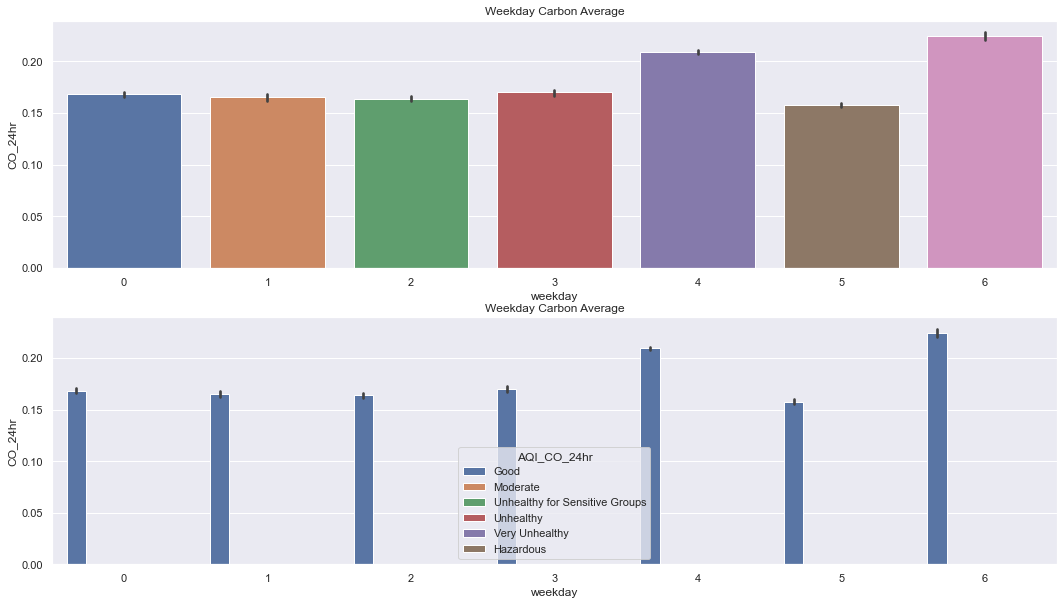

In [177]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='weekday', y='CO_24hr')
plt.title('Weekday Carbon Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='weekday', y='CO_24hr', hue='AQI_CO_24hr')
plt.title('Weekday Carbon Average')

Text(0.5, 1.0, 'Weekday Carbon Average')

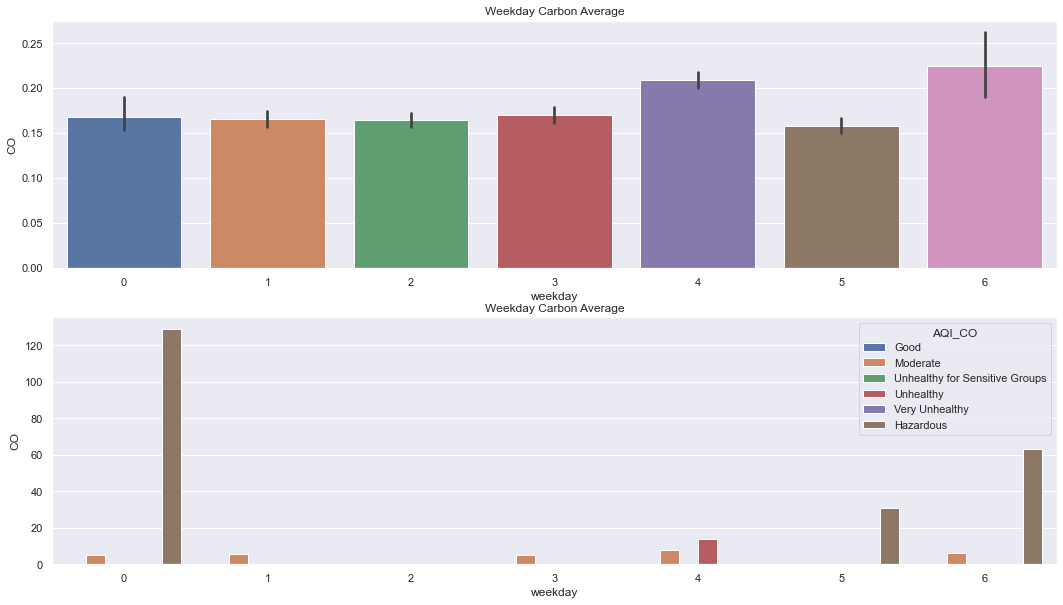

In [190]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='weekday', y='CO')
plt.title('Weekday Carbon Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='weekday', y='CO', hue='AQI_CO')
plt.title('Weekday Carbon Average')

Text(0.5, 1.0, 'Weekday PM 2.5 Average')

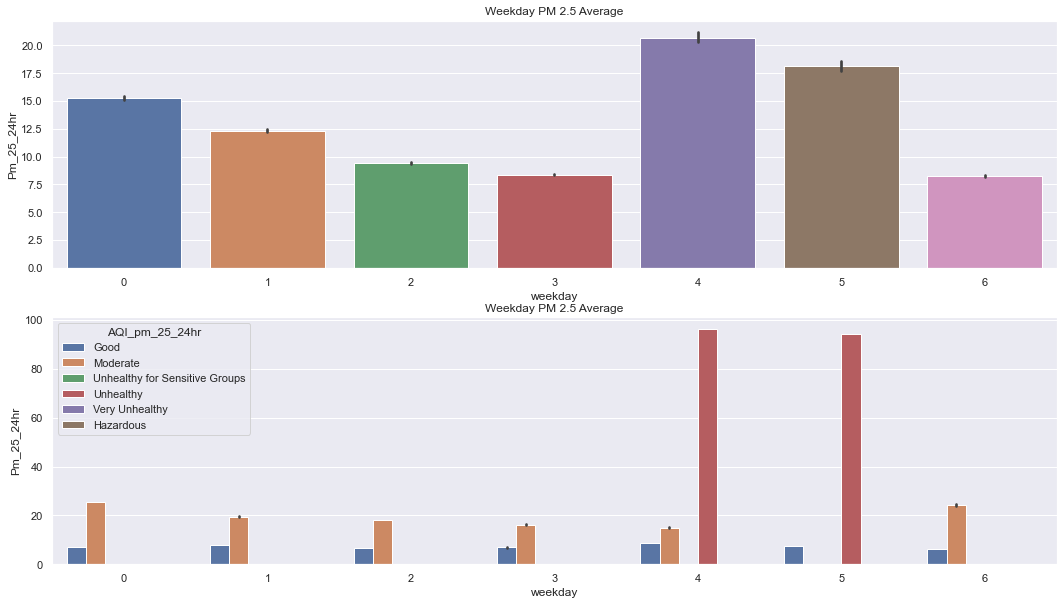

In [179]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='weekday', y='Pm_25_24hr')
plt.title('Weekday PM 2.5 Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='weekday', y='Pm_25_24hr', hue='AQI_pm_25_24hr')
plt.title('Weekday PM 2.5 Average')

Text(0.5, 1.0, 'Weekday PM 2.5 Average')

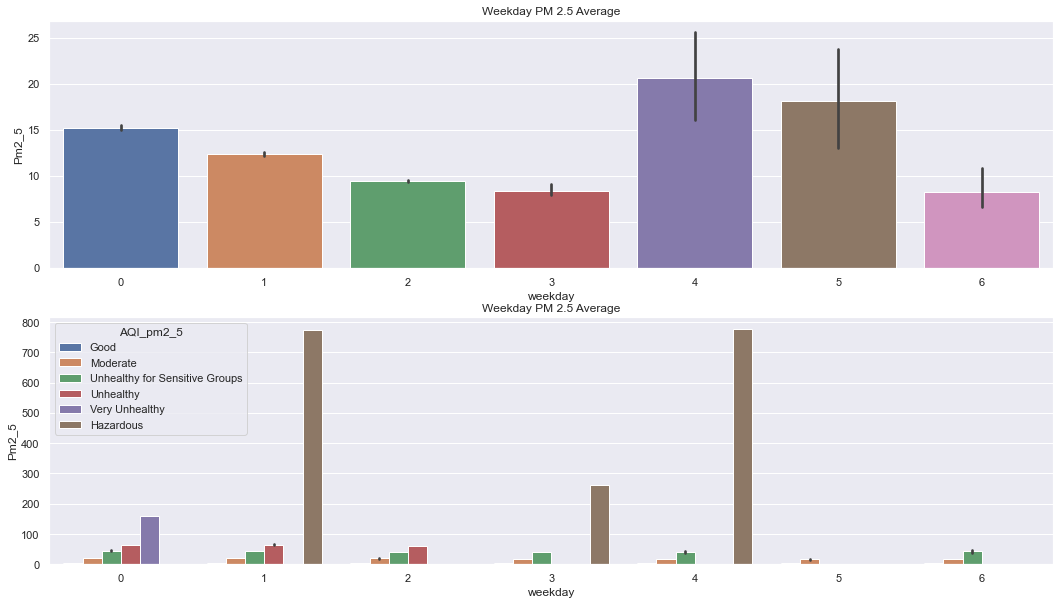

In [193]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='weekday', y='Pm2_5')
plt.title('Weekday PM 2.5 Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='weekday', y='Pm2_5', hue='AQI_pm2_5')
plt.title('Weekday PM 2.5 Average')

Text(0.5, 1.0, 'Weekday PM 10 Average')

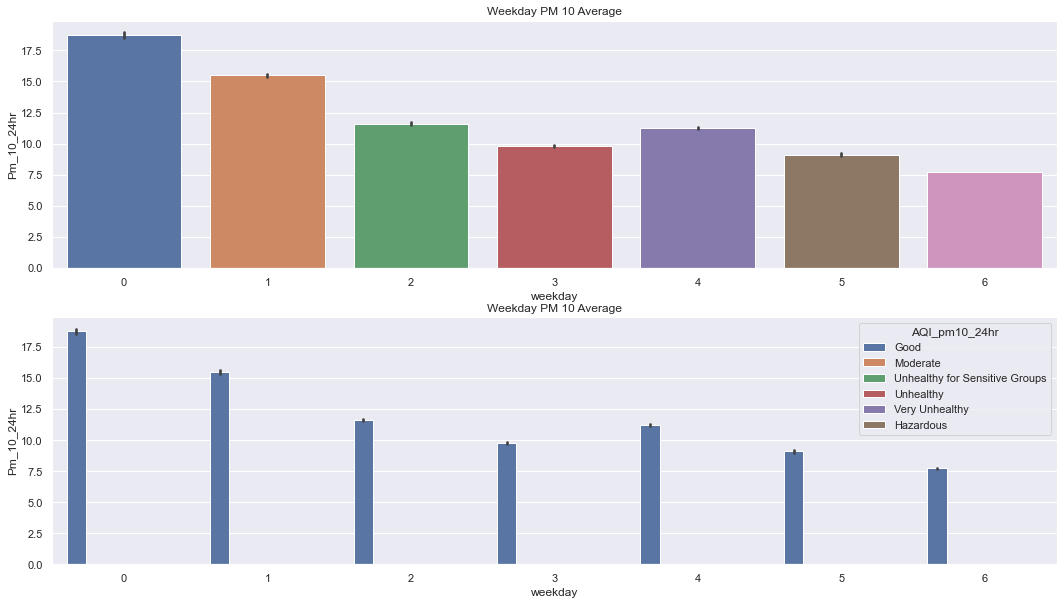

In [182]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='weekday', y='Pm_10_24hr')
plt.title('Weekday PM 10 Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='weekday', y='Pm_10_24hr', hue='AQI_pm10_24hr')
plt.title('Weekday PM 10 Average')

In [195]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106287 entries, 0 to 106286
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   datetime         106287 non-null  datetime64[ns]
 1   Pm1_0            106287 non-null  int64         
 2   Pm2_5            106287 non-null  int64         
 3   Pm10             106287 non-null  int64         
 4   SO2              106287 non-null  int64         
 5   O3               106287 non-null  float64       
 6   CO               106287 non-null  int64         
 7   NO2              106287 non-null  int64         
 8   alert_triggered  106287 non-null  object        
 9   dates            106287 non-null  object        
 10  time             106287 non-null  object        
 11  hour             106287 non-null  int64         
 12  weekday          106287 non-null  int64         
 13  AQI_CO           106287 non-null  category      
 14  CO_24hr          106

Text(0.5, 1.0, 'Weekday PM 10 Average')

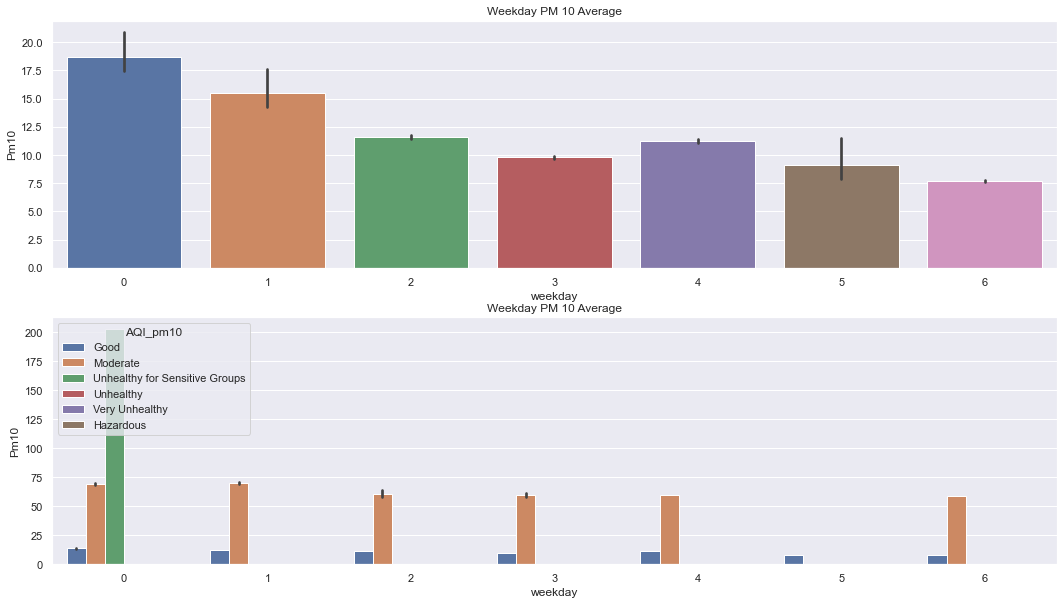

In [198]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='weekday', y='Pm10')
plt.title('Weekday PM 10 Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='weekday', y='Pm10', hue='AQI_pm10')
plt.title('Weekday PM 10 Average')

Text(0.5, 1.0, 'Weekday Carbon Average')

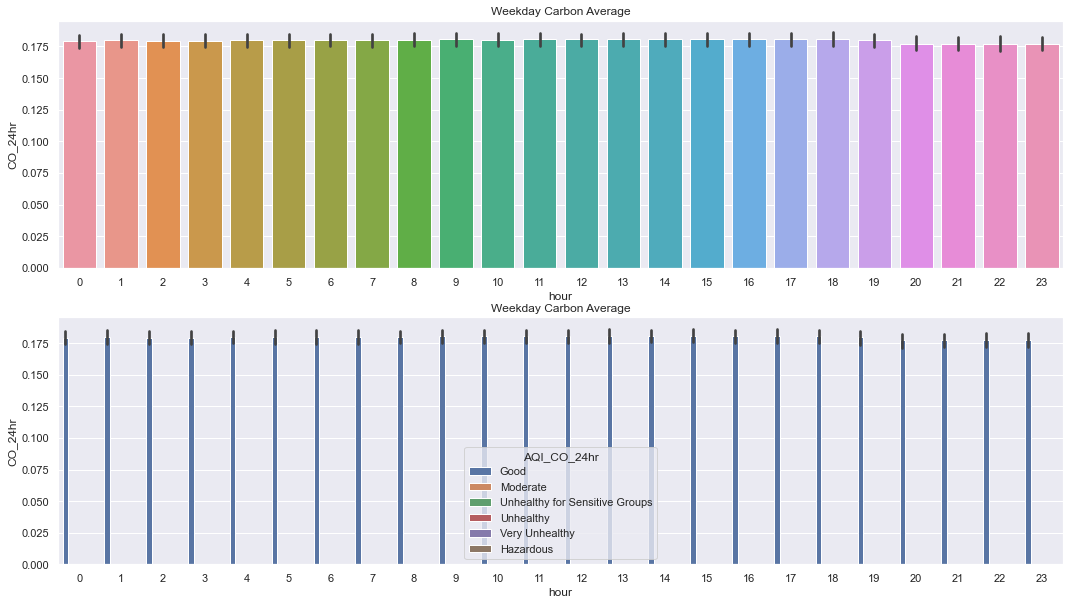

In [183]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='hour', y='CO_24hr')
plt.title('Weekday Carbon Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='hour', y='CO_24hr', hue='AQI_CO_24hr')
plt.title('Weekday Carbon Average')

Text(0.5, 1.0, 'Weekday Carbon Average')

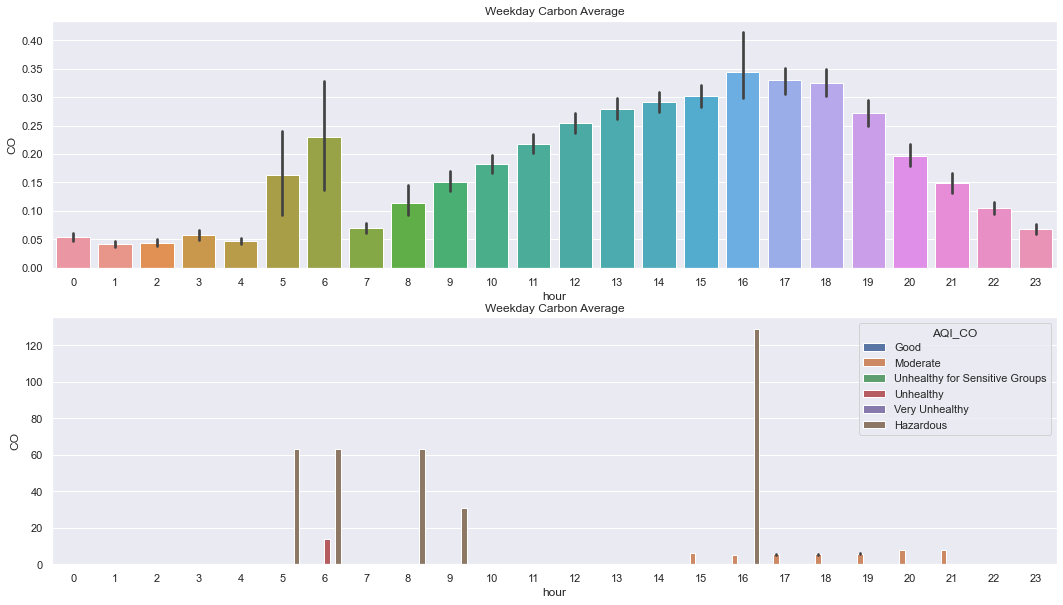

In [199]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='hour', y='CO')
plt.title('Weekday Carbon Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='hour', y='CO', hue='AQI_CO')
plt.title('Weekday Carbon Average')

Text(0.5, 1.0, 'Weekday PM 2.5 Average')

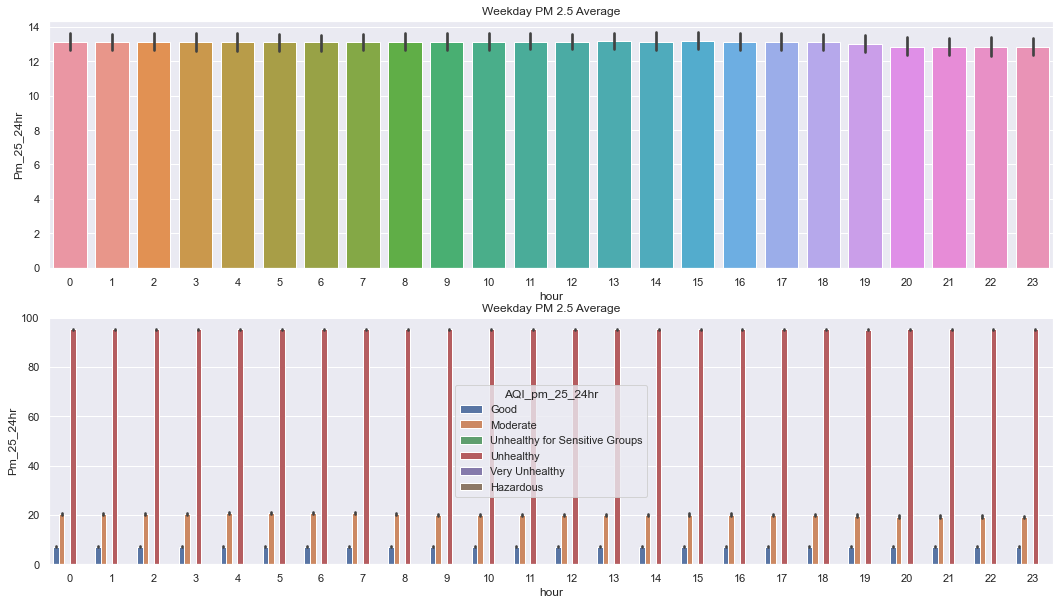

In [184]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='hour', y='Pm_25_24hr')
plt.title('Weekday PM 2.5 Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='hour', y='Pm_25_24hr', hue='AQI_pm_25_24hr')
plt.title('Weekday PM 2.5 Average')

In [200]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106287 entries, 0 to 106286
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   datetime         106287 non-null  datetime64[ns]
 1   Pm1_0            106287 non-null  int64         
 2   Pm2_5            106287 non-null  int64         
 3   Pm10             106287 non-null  int64         
 4   SO2              106287 non-null  int64         
 5   O3               106287 non-null  float64       
 6   CO               106287 non-null  int64         
 7   NO2              106287 non-null  int64         
 8   alert_triggered  106287 non-null  object        
 9   dates            106287 non-null  object        
 10  time             106287 non-null  object        
 11  hour             106287 non-null  int64         
 12  weekday          106287 non-null  int64         
 13  AQI_CO           106287 non-null  category      
 14  CO_24hr          106

Text(0.5, 1.0, 'Weekday PM 2.5 Average')

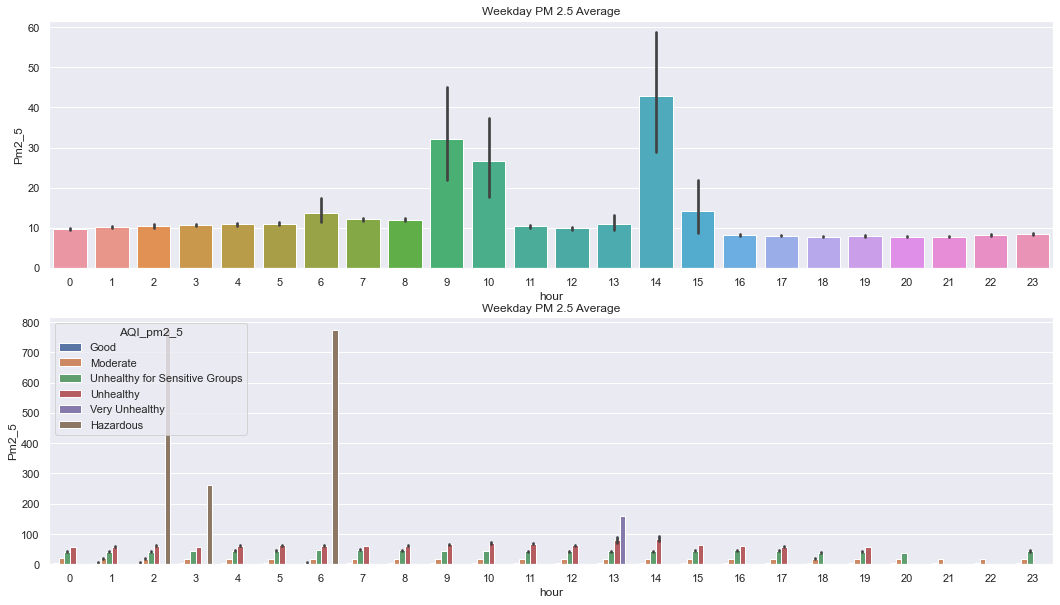

In [201]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='hour', y='Pm2_5')
plt.title('Weekday PM 2.5 Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='hour', y='Pm2_5', hue='AQI_pm2_5')
plt.title('Weekday PM 2.5 Average')

Text(0.5, 1.0, 'Weekday PM 10 Average')

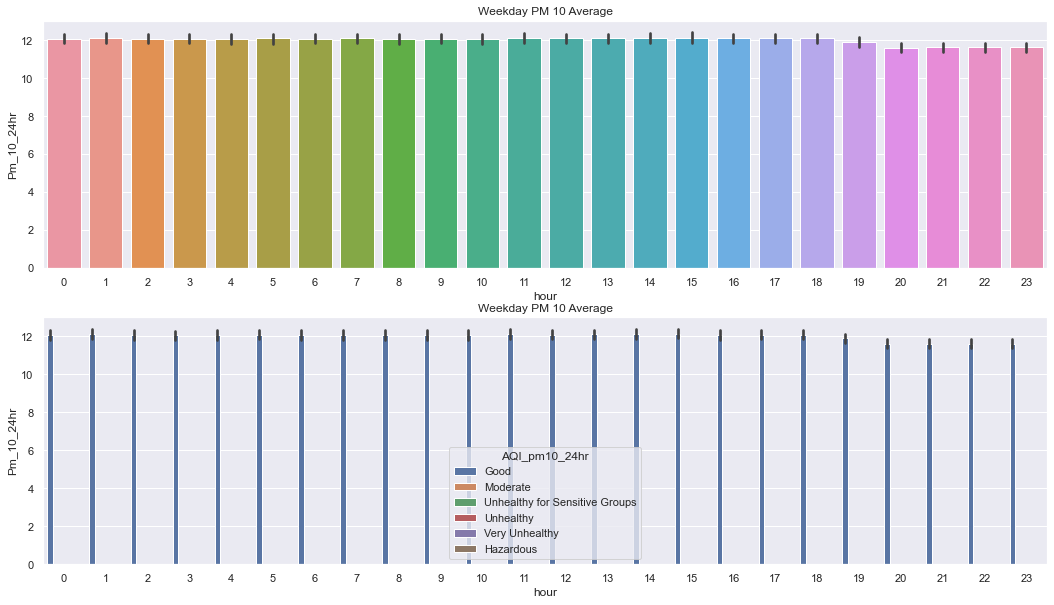

In [189]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='hour', y='Pm_10_24hr')
plt.title('Weekday PM 10 Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='hour', y='Pm_10_24hr', hue='AQI_pm10_24hr')
plt.title('Weekday PM 10 Average')

Text(0.5, 1.0, 'Weekday PM 10 Average')

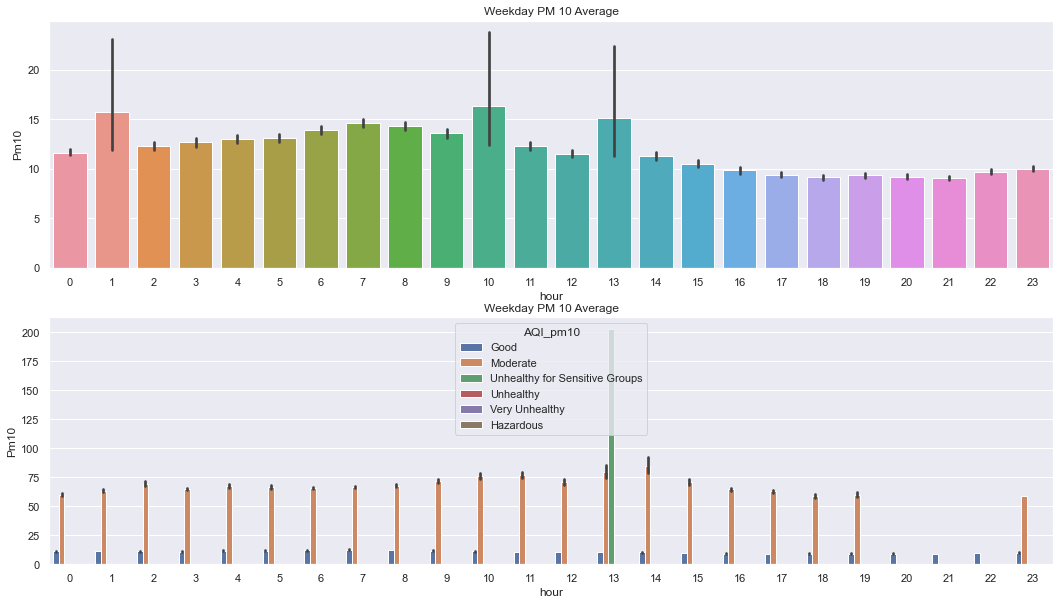

In [202]:
plt.subplots(2,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
sns.barplot(data=air, x='hour', y='Pm10')
plt.title('Weekday PM 10 Average')

plt.subplot(2,1,2)
sns.barplot(data=air, x='hour', y='Pm10', hue='AQI_pm10')
plt.title('Weekday PM 10 Average')

In [188]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106287 entries, 0 to 106286
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   datetime         106287 non-null  datetime64[ns]
 1   Pm1_0            106287 non-null  int64         
 2   Pm2_5            106287 non-null  int64         
 3   Pm10             106287 non-null  int64         
 4   SO2              106287 non-null  int64         
 5   O3               106287 non-null  float64       
 6   CO               106287 non-null  int64         
 7   NO2              106287 non-null  int64         
 8   alert_triggered  106287 non-null  object        
 9   dates            106287 non-null  object        
 10  time             106287 non-null  object        
 11  hour             106287 non-null  int64         
 12  weekday          106287 non-null  int64         
 13  AQI_CO           106287 non-null  category      
 14  CO_24hr          106